# Project: Investigate and Analysis a CSV Dataset<br>(Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset Description 

>"Medical Appointment No Shows" is CSV dataset Doctor's Appointments, and According to this dataset will we know why 30% of patients miss their scheduled appointments.

**Columns Describtion:**

>**PatientId:** Identification of a patient, 
<br>
**AppointmentID:** Identification of each appointment
<br>
**Gender:** Male or Female, 
<br>**DataMarcacaoConsulta:** The day of the actuall appointment, when they have to visit the doctor.
<br>
**DataMarcacaoConsulta:** The day of the actuall appointment, 
<br>
**DataAgendamento:** The day someone called or registered the appointment
<br>
**Age:** How old is the patient, 
<br>
**Neighbourhood:** Where the appointment takes place.
<br>
**Hypertension:** Hypertension patient or not, 
<br>
**Diabetes:** Diabetes patient or not
<br>
**Alcoholism:** Is the patient addicted to alcohol or not, 
<br>
**Handicap:** Handicap patient or not
<br>
**SMS_received:** Did the patient receive a message on time or not,
<br>
**No-show:** It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Questions for Analysis
1-How Far Are The Not Attending and Attending Patients ?
<br>
2-Does The Age Affects The Attendance ?
<br>
3-How Far Gender Affect Attendance ?
<br>
4-Does Neighbourhood Affect The Attendance ?
<br>
5-Does SMS received Message Affects The Attendance ?


In [44]:
#Import the required libraries 
import pandas as pd
import numpy as nb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#load the dataset
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [45]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

>Exploring and know More About Dataset Properties

### General Properties

In [46]:
# Here is shown Some Dataset Rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [47]:
# Here is shown Some Quicke Statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [48]:
# Here is Shown Number of Unique Values in Each Column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [49]:
# Here is shown Dataset Shape
df.shape

(110527, 14)

In [50]:
# Get Rows Of -1 Age Value with is the min Age
df.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [51]:
# Here is shown that there is no null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [52]:
# Here is 110527 false values which shown that there is no duplicated full Rows values
df.duplicated().value_counts()

False    110527
dtype: int64

In [53]:
# Here is shown that there is no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning (Prepare The Data For Analysis)

In [54]:
# Rename The Column No-show to NO_Attendance To make it easier  to Deal With it
df.rename(columns={"No-show":"NO_Attendance"},inplace=True)

In [55]:
# Removeing The Duplicated ids with Duplicated Show Status
df.drop_duplicates(['PatientId','NO_Attendance'],inplace=True)

In [56]:
# Delete Row With -1 Age Value
df.drop(labels=99832,axis=0,inplace=True)

In [57]:
# Check Min Age 
df.Age.min()

0

In [58]:
# Removing Columns That We Don't Need in Our Analysis
df.drop(['AppointmentID','PatientId','AppointmentDay','ScheduledDay'],axis=1,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


In [59]:
# Here is shown that there is no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 10 columns):
Gender           71816 non-null object
Age              71816 non-null int64
Neighbourhood    71816 non-null object
Scholarship      71816 non-null int64
Hipertension     71816 non-null int64
Diabetes         71816 non-null int64
Alcoholism       71816 non-null int64
Handcap          71816 non-null int64
SMS_received     71816 non-null int64
NO_Attendance    71816 non-null object
dtypes: int64(7), object(3)
memory usage: 6.0+ MB


In [60]:
# Here is shown Some Quicke Statistics 
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000
mean,36.527501,0.095536,0.195068,0.070959,0.025036,0.020135,0.335566
std,23.378262,0.293956,0.396256,0.256758,0.156236,0.155338,0.472191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Research Question 1  ( How Far Are The Not Attending and Attending Patients ? )

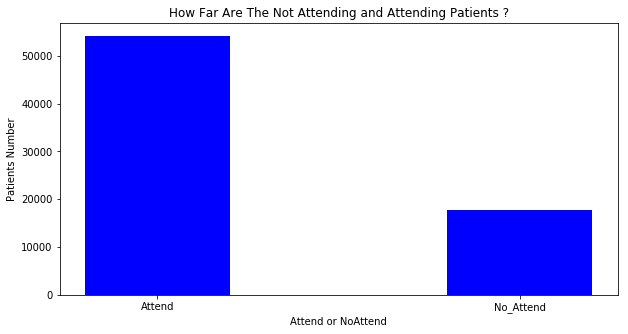

In [61]:
# Let's Make 2 Masks to Saperate The Data to Not Attend and Attend Patients
NoAttend=df.query("NO_Attendance=='Yes'")
Attend=df.query("NO_Attendance=='No'")

# Here is Shown That The Number of Attend the appointment is smaller Than Not Attend the appointment with Three Times
fig = plt.figure(figsize = (10, 5))
plt.bar(['No_Attend','Attend'], [NoAttend.NO_Attendance.count(),Attend.NO_Attendance.count()], color ='blue',width = 0.4)
plt.xlabel("Attend or NoAttend")
plt.ylabel("Patients Number")
plt.title("How Far Are The Not Attending and Attending Patients ?")
plt.show()

In [62]:
print('Number Of Not Attend :',NoAttend.NO_Attendance.count(),'\n',
      'Number Of Attend :',Attend.NO_Attendance.count(),'\n',
      'Percentage Of Not Attend To Attend Patients :',(NoAttend.NO_Attendance.count()/Attend.NO_Attendance.count()*100),'%')

Number Of Not Attend : 17663 
 Number Of Attend : 54153 
 Percentage Of Not Attend To Attend Patients : 32.6168448655 %


#### Here is Shown That The Number of Not Attend the appointment is smaller Than Attend the appointment with Three Times <br> Percentage Of Not Attend To Attend Patients : 32.6168448655 %

## Research Question 2  ( Does The Age Affects The Attendance ? )

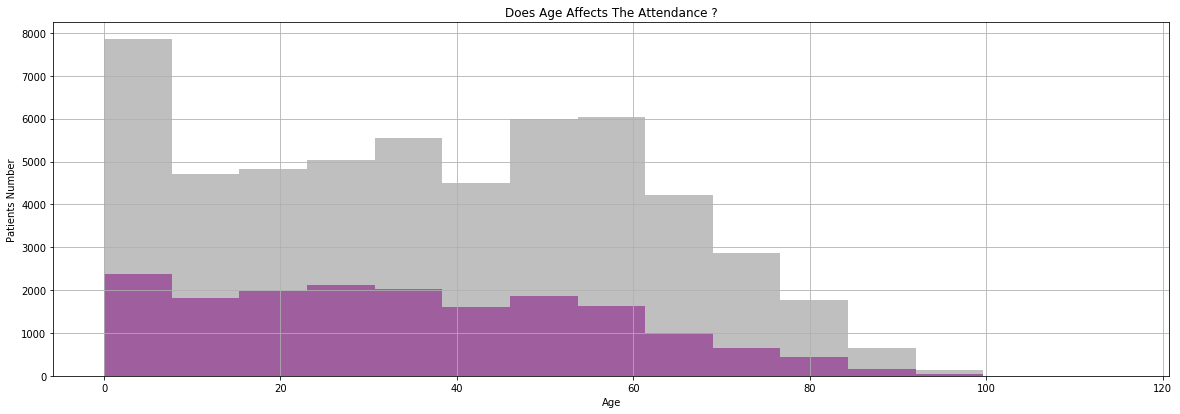

In [63]:
# Making Masks For Attend and Not Attend Patients
Attend_o=df.NO_Attendance=='No'
NoAttend_o=df.NO_Attendance=='Yes'

# Make Histagram Between Age And Patient Attendance
plt.figure(figsize=[20,6.5])
df['Age'][Attend_o].hist(alpha=.25,bins=15,color='black',label='Attend')
df['Age'][NoAttend_o].hist(alpha=.5,bins=15,color='purple',label='NoAttend')
plt.title('Does Age Affects The Attendance ?')
plt.xlabel('Age')
plt.ylabel('Patients Number');

#### Here is Shown That Yes, The Patients Between (0:8) ,(45,61)  Years Old Are The Most Attend

## Research Question 3  ( How Far Gender Affect Attendance ? )

In [64]:
def Gender_Affect(State_Of_Attentance,y_axis): # Function to count Number of Each Gender With The Attendance
    plt.figure(figsize=[10,6.5])
    df['Gender'][State_Of_Attentance].value_counts(normalize=True).plot(label='Attend',kind='pie',autopct='%1.1f%%')
    plt.legend();
    plt.title('Does Gender Affects The Attendance ?')
    plt.xlabel('Gender')
    plt.ylabel(y_axis);

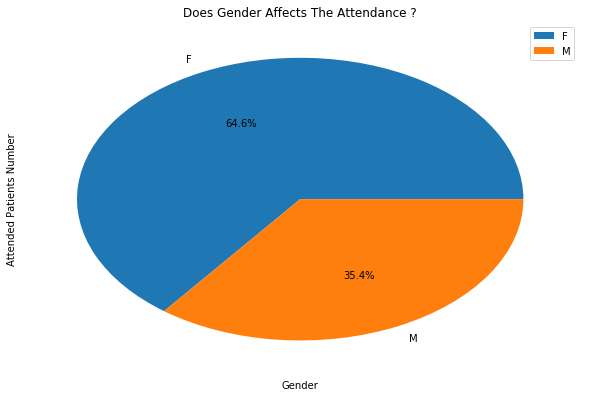

In [65]:
# Use Of Gender_Affect Function With Attended Patients
y_axis='Attended Patients Number'
Gender_Affect(Attend_o,y_axis)

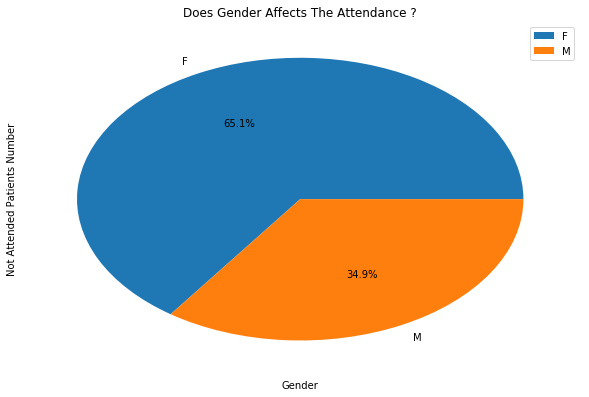

In [66]:
# Use Of Gender_Affect Function With Not Attended Patients
y_axis='Not Attended Patients Number'
Gender_Affect(NoAttend_o,y_axis)

In [67]:
def Felmale_TO_Male(State_Of_Attend,NO_OR_YES):# Function To Calculate The Percantage Between Female And Male in Attendance
    print('Female To Male Who ',NO_OR_YES,' Attend: ',df['Gender'][State_Of_Attend].value_counts()[0]/df['Gender'][State_Of_Attend].value_counts()[1])

# Using Felmale_TO_Male To Calculate The Percantage Between Female And Male in Attendance
Felmale_TO_Male(Attend_o,"Yes")
Felmale_TO_Male(NoAttend_o,"NO")

Female To Male Who  Yes  Attend:  1.82149742093
Female To Male Who  NO  Attend:  1.86876725678


#### Here is Shown That Women Care More About Them Health But Gender Doesn't affect The Attendance
>Female To Male Who Attend:  1.82149742093<br>
Female To Male Who NoT Attend:  1.86876725678

## Research Question 4 ( Does Neighbourhood Affect The Attendance ?)

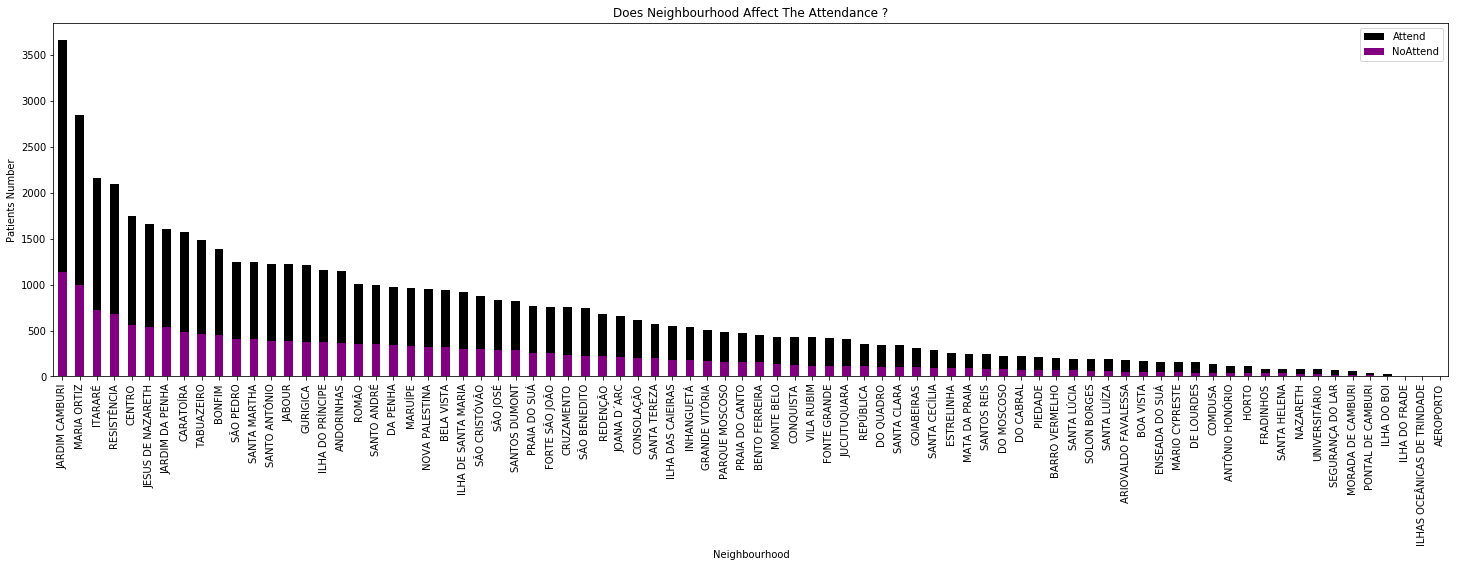

In [68]:
def Neighbourhood_Affect (Attend_o,NoAttend_o):# Does Neighbourhood Affect The Attendance ?
    plt.figure(figsize=[25,6.5])
    df['Neighbourhood'][Attend_o].value_counts().plot(kind='bar',color='black',label='Attend')
    df['Neighbourhood'][NoAttend_o].value_counts().plot(kind='bar',color='purple',label='NoAttend')
    plt.title('Does Neighbourhood Affect The Attendance ?')
    plt.legend();
    plt.xlabel('Neighbourhood')
    plt.ylabel('Patients Number');

Neighbourhood_Affect (Attend_o,NoAttend_o)

### Here is Shown That Neighbourhood Has a Big Effect On Attendance

## Research Question 5  ( Does SMS received Message Affects The Attendance ?)


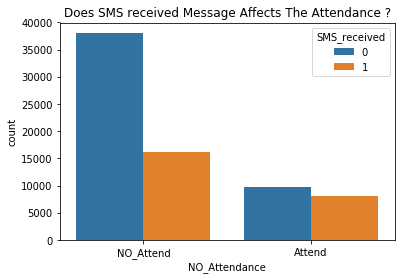

In [69]:
def SMS(SMS_received,NO_Attendance):# Does SMS received Message Affects The Attendance ?
    sms_affect=sns.countplot(x=NO_Attendance,hue=SMS_received,data=df)
    sms_affect.set_title('Does SMS received Message Affects The Attendance ?')
    sms_affect.set_xticklabels(['NO_Attend','Attend'])
    
SMS(df.SMS_received,df.NO_Attendance)

In [70]:
# Function To Compare Between State Of Attendance And Receiving SMS
def ATTEND_SMS(YES_OR_NO,State_Of_Attend):
    print(YES_OR_NO,'Attend Without SMS',df['SMS_received'][State_Of_Attend].value_counts()[0],'\n',
         YES_OR_NO,'Attend With SMS',df['SMS_received'][State_Of_Attend].value_counts()[1],'\n'
     )
# Using ATTEND_SMS Function
ATTEND_SMS('YES',Attend_o)
ATTEND_SMS('NO',NoAttend_o)

YES Attend Without SMS 38057 
 YES Attend With SMS 16096 

NO Attend Without SMS 9660 
 NO Attend With SMS 8003 



### Here is Shown That Patients Who Attended And Not Received SMS Are Much More Patients Who Attended And Received.<br><br>Patients Who Not Attended And Not Received SMS Are Much More Patients Who Not Attended And Received.
### So, The Final Comment is That The Committee Which Sends The SMS Need To Be Checked

<a id='conclusions'></a>
## Conclusions
<br>
1-How Far Are The Not Attending and Attending Patients ?
<br>
The Number of Not Attend the appointment is smaller Than Attend the appointment with Three Times<br>
Percentage Of Not Attend To Attend Patients : 32.6168448655 %
<br>

<br>
2-Does The Age Affects The Attendance ?
<br>
Yes, The Patients Between (0:8) ,(45,61)  Years Old Are The Most Attend
<br>

<br>
3-How Far Gender Affect Attendance ?
<br>
Women Care More About Them Health But Gender Doesn't affect The Attendance<br>
Female To Male Who Attend:  1.82149742093<br>
Female To Male Who NoT Attend:  1.86876725678
<br>
<br>
4-Does Neighbourhood Affect The Attendance ?
<br>
Neighbourhood Has a Big Effect On Attendance
<br>
<br>
5-Does SMS received Message Affects The Attendance ?
<br>
Patients Who Attended And Not Received SMS Are Much More Patients Who Attended And Received.
<br><br>
Patients Who Not Attended And Not Received SMS Are Much More Patients Who Not Attended And Received.<br><br>
The Final Comment on "Question 5" is That The Committee Which Sends The SMS Need To Be Checked


### Summing up all of this:


#### Age: 
Certain age bunches appeared to appear up more than others such as those underneath 10 a long time ancient and those between ages 35 and 70.

#### SMS_received: 
While it may not be straightforwardly related, it was astounding to memorize that more individuals appeared up without accepting an SMS reminder. 

#### Neighbourhood: 
Seems to be kind of related to patients appearing up for their appointment.

### Limitations 
We couldn't discover a coordinated relationship between attendance and the other variables like hypertension, diabetes, Gender, handicap, and alcoholism .


In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0